## What is K-Means?

* ``K = # of clusters``

* ``The goal is to categorize data into cluster:``
    * Data points in the same cluster are more similar to each other when compared to other data points

* ``Unsupervised Learning:``
    * Leanring from unlabeled data

    * We are trying to identify patterns and structures wihtout any specific output label

    * GOAL: find hidden patterns and structures in input data

* ``We will perform clustering using the K-Means clustering algorithm. Which is unsupervised learning.``


In [151]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [152]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [153]:
# Check dataset for missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [154]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [156]:
# Changing name of columns for better readability
df.rename(columns={'Annual Income (k$)':'annual_income',
                   'Spending Score (1-100)':'spending_score',
                   'CustomerID':'customer_id',
                   'Age':'age',
                   'Gender':'gender'},
                   inplace=True)
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


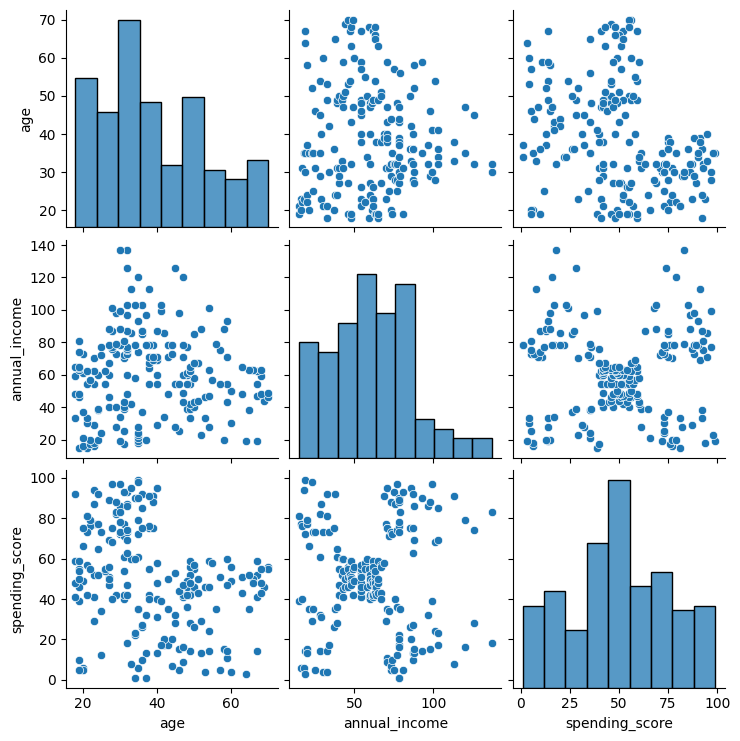

In [157]:
sns.pairplot(df[['age', 'annual_income', 'spending_score']])

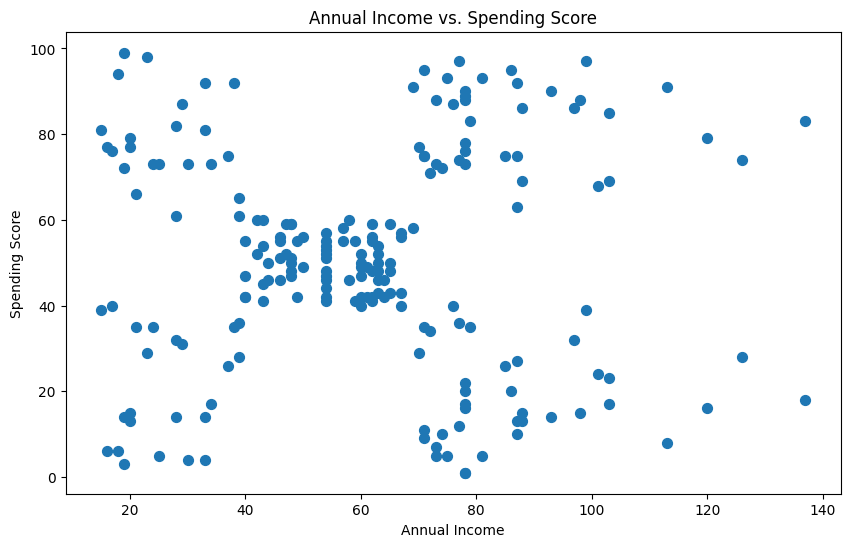

In [158]:
plt.figure(figsize=(10,6))
plt.scatter(df['annual_income'], df['spending_score'], s=50) # s=50 is the size of the dots
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Annual Income vs. Spending Score')
plt.show()

## Applying Elbow Method to find the number of clusters:

* `Elbow method is a way to identify the number of clusters.`

* `Advantages:`
    * Helps avoid overfitting but not choosing too many clusters

* `Disadvantages:`
    * Might not always be clear or well defined

* `Definition:`

    * Link : https://en.wikipedia.org/wiki/Elbow_method_(clustering)

    * In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use. The same method can be used to choose the number of parameters in other data-driven models, such as the number of principal components to describe a data set.



In [159]:
# Features for clustering
X = df[['annual_income', 'spending_score']]

optimal_cluster_num = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)

    # Inertia measures how well a dataset was clustered by K-Means
    optimal_cluster_num.append(kmeans.inertia_)

* Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

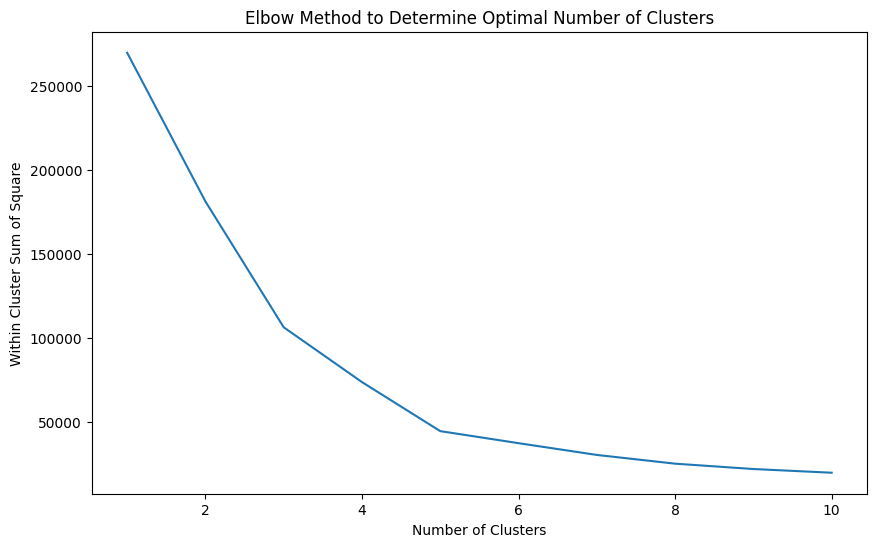

In [160]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11), optimal_cluster_num)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Square')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.show()

* Optimal Number of Clusters = 5

In [161]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

In [162]:
# Adding labels produced by this model back into original data
# We will see the cluster each customer belongs to

df['cluster'] = y_kmeans
df.head()

,customer_id,gender,age,annual_income,spending_score,cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


## Visualization

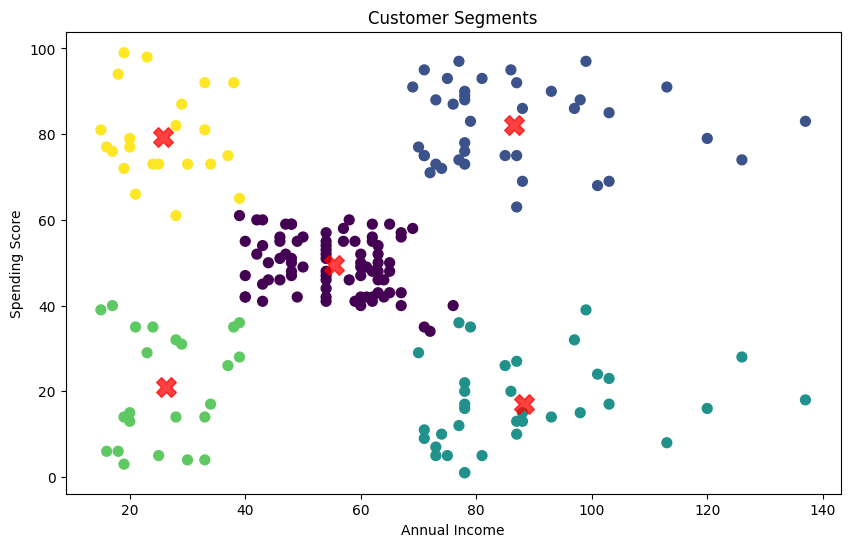

In [163]:
plt.figure(figsize=(10,6))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=0.75, marker='X')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segments')
plt.show()

## Age vs Spending Score

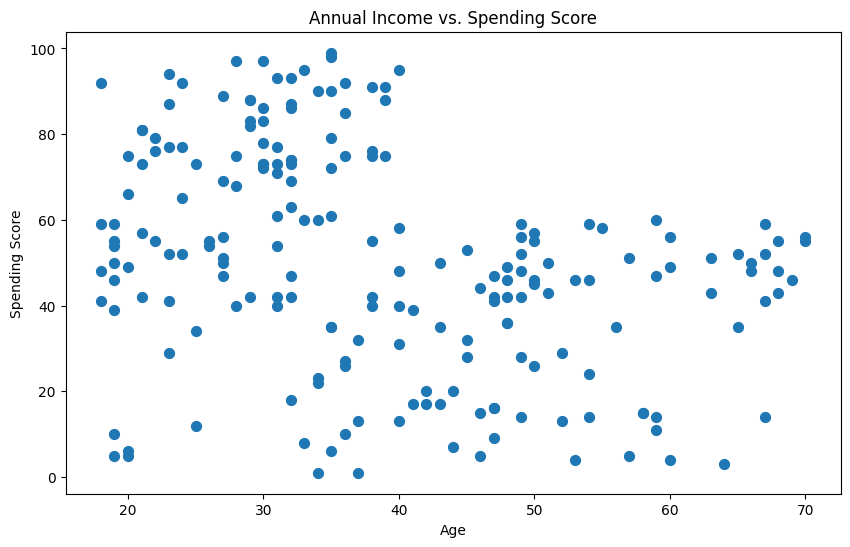

In [164]:
# Age vs Spending Score
plt.figure(figsize=(10,6))
plt.scatter(df['age'], df['spending_score'], s=50) # s=50 is the size of the dots
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Annual Income vs. Spending Score')
plt.show()

In [165]:
# Features for clustering
X = df[['age', 'spending_score']]

optimal_cluster_num = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)

    # Inertia measures how well a dataset was clustered by K-Means
    optimal_cluster_num.append(kmeans.inertia_)

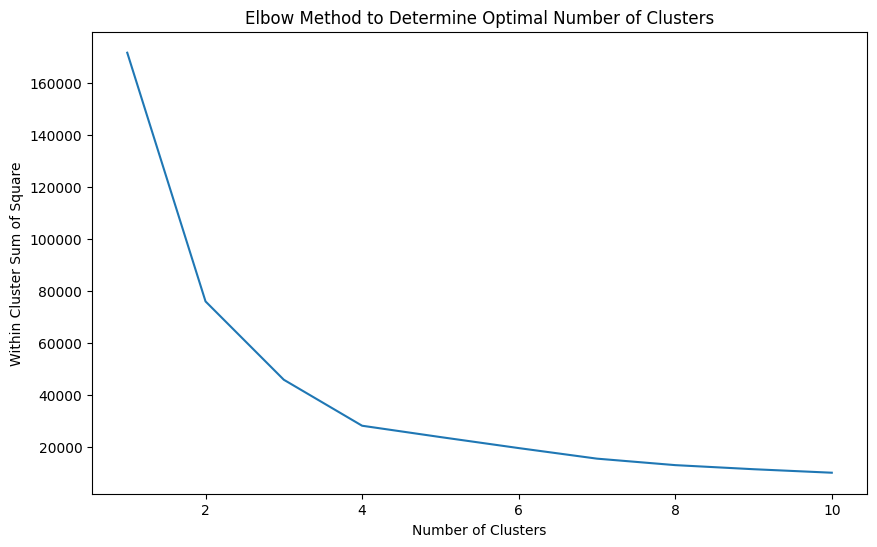

In [166]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11), optimal_cluster_num)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Square')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.show()

* Optimal Cluster # = 4

In [167]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

In [168]:
df['cluster_age'] = y_kmeans
df.head()

,customer_id,gender,age,annual_income,spending_score,cluster,cluster_age
0,1,Male,19,15,39,3,3
1,2,Male,21,15,81,4,1
2,3,Female,20,16,6,3,2
3,4,Female,23,16,77,4,1
4,5,Female,31,17,40,3,3


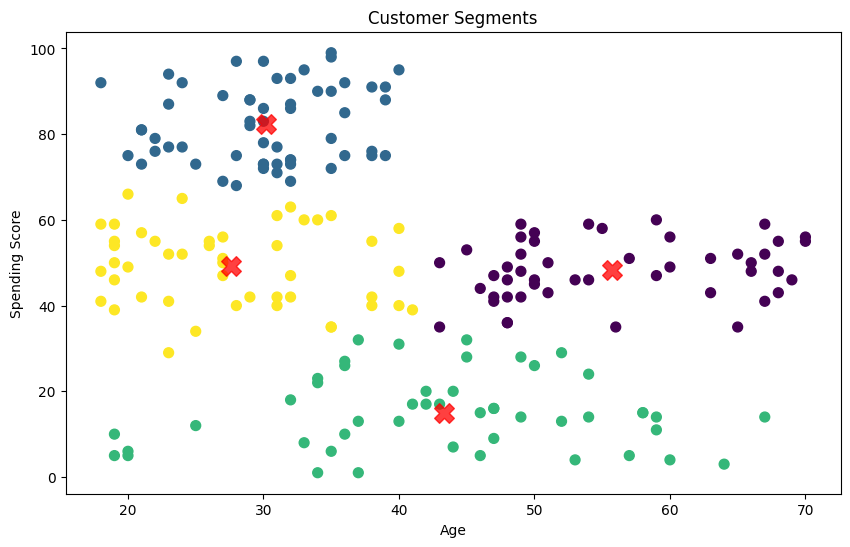

In [169]:
plt.figure(figsize=(10,6))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=0.75, marker='X')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Customer Segments')
plt.show()

## 3D Graph of Age, Income, and Spending Score

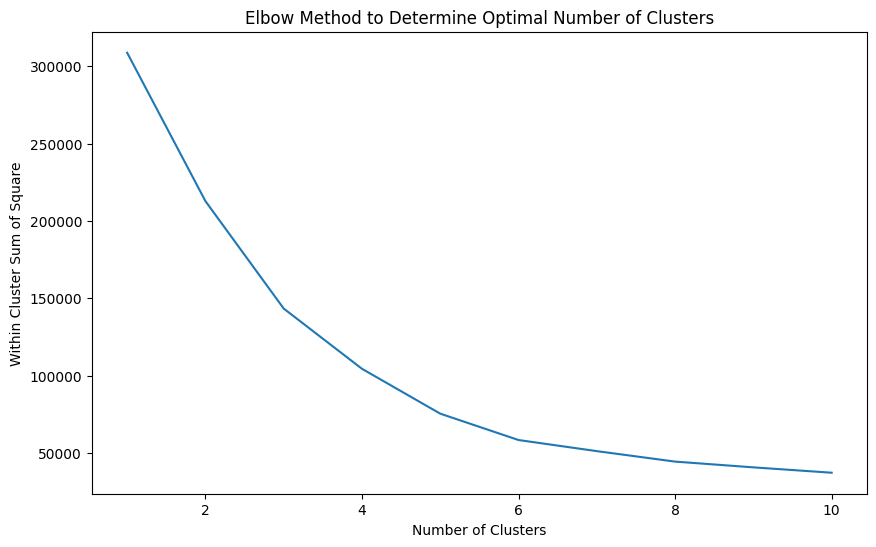

In [170]:
# Features for clustering
X = df[['age', 'annual_income', 'spending_score']]

optimal_cluster_num = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)

    # Inertia measures how well a dataset was clustered by K-Means
    optimal_cluster_num.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,11), optimal_cluster_num)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Square')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.show()

* Optimal Cluster # (K) = 6

In [171]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

df['cluster_age_income_spend'] = y_kmeans
df.head()

,customer_id,gender,age,annual_income,spending_score,cluster,cluster_age,cluster_age_income_spend
0,1,Male,19,15,39,3,3,4
1,2,Male,21,15,81,4,1,5
2,3,Female,20,16,6,3,2,4
3,4,Female,23,16,77,4,1,5
4,5,Female,31,17,40,3,3,4


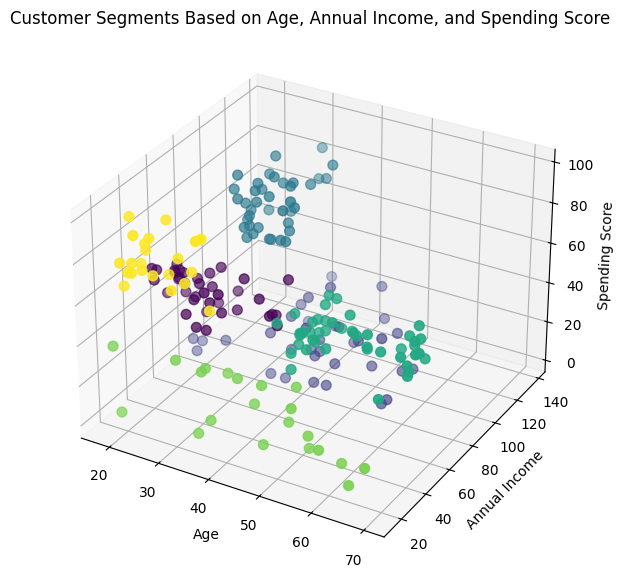

In [177]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'], df['annual_income'], df['spending_score'], c=df['cluster_age_income_spend'],s=50, cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.title('Customer Segments Based on Age, Annual Income, and Spending Score')
plt.show()